In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
! mkdir ~/.kaggle

In [5]:
from google.colab import drive

In [6]:
drive.mount('Drive')

Mounted at Drive


In [7]:
! cp Drive/MyDrive/kaggle.json ~/.kaggle

In [8]:
! kaggle datasets download uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
100% 211k/211k [00:00<00:00, 744kB/s]
100% 211k/211k [00:00<00:00, 743kB/s]


In [9]:
! unzip /content/sms-spam-collection-dataset.zip

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [10]:
data = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [11]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [12]:
data.shape

(5572, 5)

In [13]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [14]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [15]:
data.drop(columns=['Unnamed: '+str(i) for i in range(2,5)],inplace=True)

In [16]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
data['v1'].value_counts()

,count
v1,
ham,4825
spam,747


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()
data['v1']=le.fit_transform(data['v1'])

In [20]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
data.duplicated().sum()

403

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
data['v1'].value_counts()

,count
v1,
0,4516
1,653


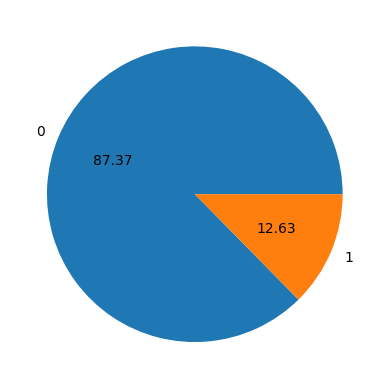

In [24]:
plt.pie(data['v1'].value_counts(),labels=data['v1'].value_counts().index,autopct='%.2f')
plt.show()

In [25]:
import nltk

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [27]:
data['num_char']=data['v2'].apply(len)

In [28]:
data['num_word']=data['v2'].apply(lambda i :  len(nltk.word_tokenize(i)))

In [29]:
data['num_sent']=data['v2'].apply(lambda i : len(nltk.sent_tokenize(i)))

In [30]:
data.head()

,v1,v2,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
data[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
data[data['v1']==0].describe()

,v1,num_char,num_word,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [33]:
data[data['v1']==1].describe()

,v1,num_char,num_word,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


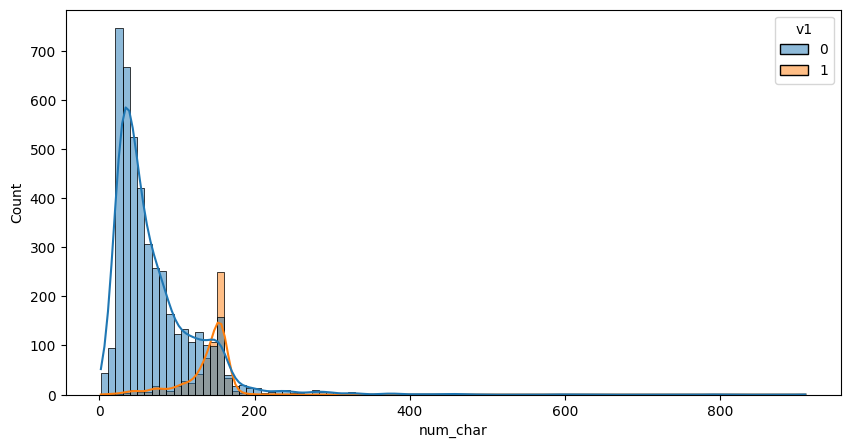

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(data=data,x='num_char',hue='v1',kde=True)
plt.show()

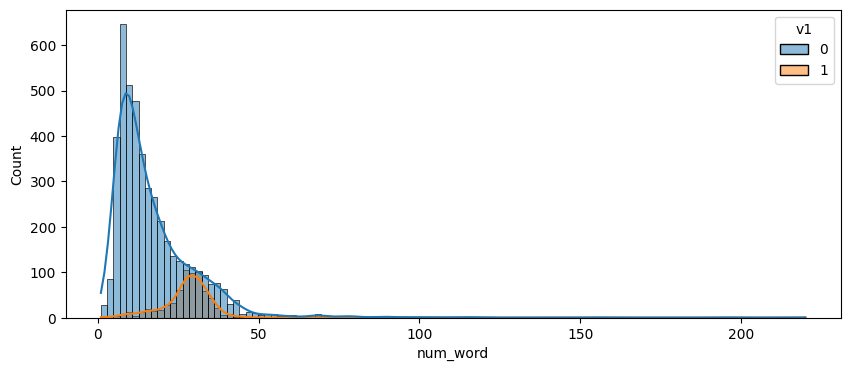

In [35]:
plt.figure(figsize=(10,4))
sns.histplot(data=data,x='num_word',hue='v1',kde=True)
plt.show()

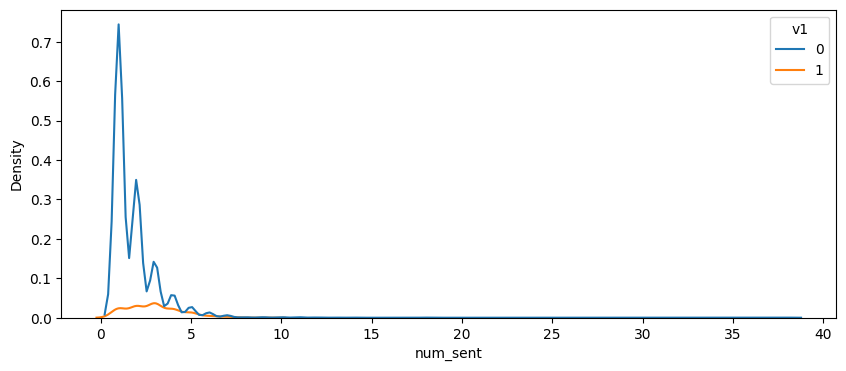

In [36]:
plt.figure(figsize=(10,4))
sns.kdeplot(data=data,x='num_sent',hue='v1')
plt.show()

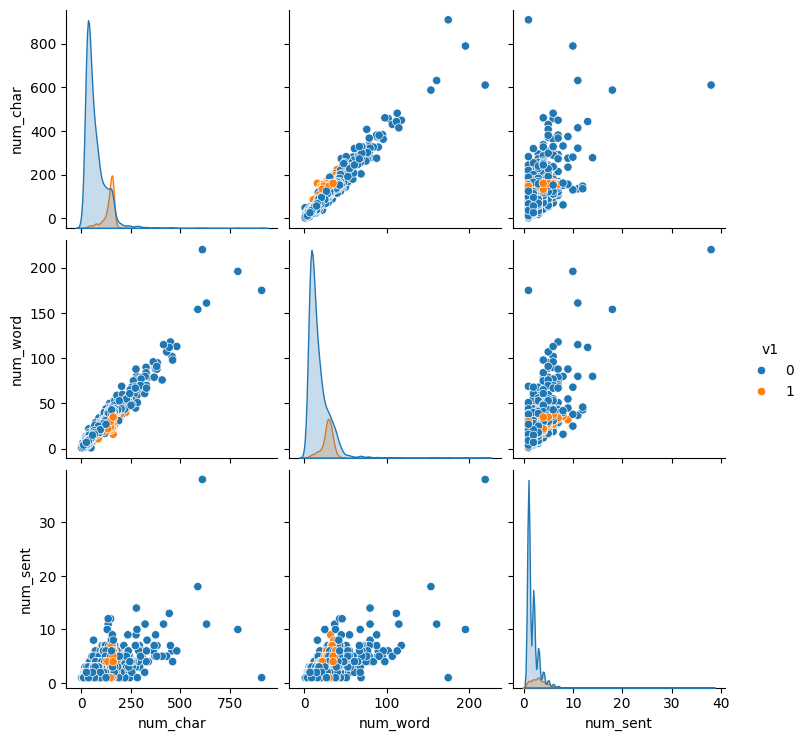

In [37]:
sns.pairplot(data=data,hue='v1')

<Axes: >

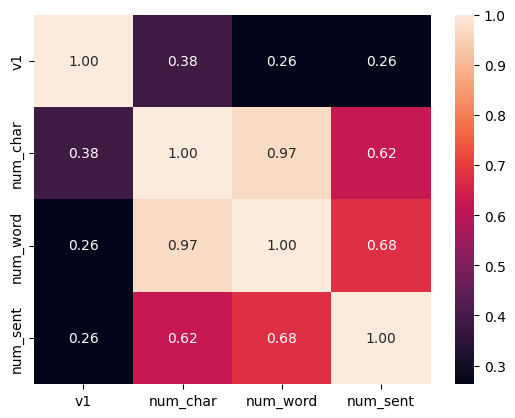

In [38]:
sns.heatmap(data.drop(columns=['v2']).corr(),annot=True, fmt='.2f')

In [39]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [40]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [41]:
ps = PorterStemmer()

In [42]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  text=[i for i in text if i.isalnum()]
  text=[i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
  text=[ps.stem(i) for i in text]
  return " ".join(text)

In [43]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I")

'gon na home soon want talk stuff anymor tonight k'

In [44]:
data['new_v2']=data['v2'].apply(transform_text)

In [45]:
data.head()

,v1,v2,num_char,num_word,num_sent,new_v2
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from collections import Counter

In [47]:
words=[]

for i in data['new_v2']:
  for j in i.split(' '):
    words.append(j)

In [48]:
Counter(words).most_common(20)

[('u', 1002),
 ('call', 553),
 ('2', 439),
 ('go', 436),
 ('get', 423),
 ('ur', 316),
 ('gt', 288),
 ('lt', 287),
 ('come', 280),
 ('know', 255),
 ('4', 253),
 ('free', 246),
 ('like', 246),
 ('got', 242),
 ('want', 239),
 ('time', 237),
 ('love', 226),
 ('good', 225),
 ('ok', 222),
 ('day', 216)]

<ipython-input-67-253f8171f0b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(words).most_common(20))[0],y=pd.DataFrame(Counter(words).most_common(20))[1],palette='viridis')


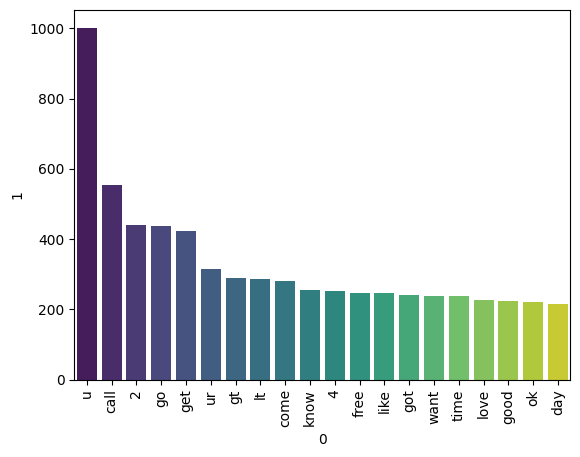

In [67]:
sns.barplot(x=pd.DataFrame(Counter(words).most_common(20))[0],y=pd.DataFrame(Counter(words).most_common(20))[1],palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [107]:
tfidf = TfidfVectorizer()
X=tfidf.fit_transform(data['new_v2']).toarray()

In [71]:
X.shape

(5169, 6708)

In [81]:
y=np.array(data['v1'])

In [76]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [86]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [87]:
models = {
    'gnb':GaussianNB(),
    'mnb':MultinomialNB(),
    'bnb':BernoulliNB()
}

In [88]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [99]:
for i in models:
  m = models[i]
  m.fit(X_train,y_train)
  y_pred=m.predict(X_test)
  print(i+" ->  accuracy : "+str(accuracy_score(y_pred,y_test))+"  precision : "+str(precision_score(y_test,y_pred)))
  print(confusion_matrix(y_test,y_pred))

gnb ->  accuracy : 0.8762088974854932  precision : 0.5231481481481481
[[793 103]
 [ 25 113]]
mnb ->  accuracy : 0.9593810444874274  precision : 1.0
[[896   0]
 [ 42  96]]
bnb ->  accuracy : 0.9700193423597679  precision : 0.9734513274336283
[[893   3]
 [ 28 110]]


In [100]:
model = models['mnb']

In [103]:
accuracy_score(y_test,model.predict(X_test)), precision_score(y_test,model.predict(X_test))

(0.9593810444874274, 1.0)

In [104]:
import pickle

In [108]:
pickle.dump(model,open('modle.pkl','wb'))

In [109]:
pickle.dump(tfidf,open('tfidf.pkl','wb'))